**Implemented By Muhammad Hanan Asghar**

In [26]:
!nvidia-smi

Sun Jun  6 22:57:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tf-models-official
!pip install tf_slim

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 58071, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 58071 (delta 100), reused 235 (delta 95), pack-reused 57831
Receiving objects: 100% (58071/58071), 572.98 MiB | 35.80 MiB/s, done.
Resolving deltas: 100% (40238/40238), done.


In [ ]:
!unzip /content/drive/MyDrive/object-detection.zip

##Protobuf Compilation

In [33]:
%cd "/content/models/research"

!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


##Settings

In [6]:
!python -m pip install --upgrade pip 

     |████████████████████████████████| 1.6MB 7.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
!cp object_detection/packages/tf2/setup.py .
!python -m pip install --use-feature=2020-resolver .

In [ ]:
# Test the installation.
!python object_detection/builders/model_builder_tf2_test.py

##Training and Configrations

In [9]:
%cd "/content/object-detection"

/content/object-detection


In [ ]:
!python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=data/train.record --image_dir=images/train/

In [ ]:
!python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=data/test.record --image_dir=images/test/     

In [10]:
!cp "/content/drive/MyDrive/record_files/part2/train.record" "/content/object-detection/data"
!cp "/content/drive/MyDrive/record_files/part2/test.record" "/content/object-detection/data"

##Configration Files

In [11]:
%cd /content

/content


In [12]:
!wget "http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz"

--2021-06-06 22:43:03--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.195.128, 2607:f8b0:400e:c05::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  --.-KB/s    in 0.1s    

2021-06-06 22:43:03 (266 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [13]:
!cp "/content/efficientdet_d0_coco17_tpu-32.tar.gz" "/content/object-detection"

In [14]:
%cd "/content/object-detection"

/content/object-detection


In [ ]:
!tar -xvf "/content/object-detection/efficientdet_d0_coco17_tpu-32.tar.gz"

In [16]:
!rm -rf *.tar.gz

In [17]:
%cd /content

/content


##Copying Our Setup Folder to Place inside models

In [18]:
!cp -r "/content/object-detection/data" "/content/models/research/object_detection"
!cp -r "/content/object-detection/images" "/content/models/research/object_detection"
!cp -r "/content/object-detection/efficientdet_d0_coco17_tpu-32" "/content/models/research/object_detection"
!cp -r "/content/object-detection/training" "/content/models/research/object_detection"
!cp "/content/object-detection/training/ssd_efficientdet_d0_512x512_coco17_tpu-8.config" "/content/models/research/object_detection"

In [19]:
%cd "/content/models/research/object_detection"

/content/models/research/object_detection


In [20]:
!cp "/content/object-detection/training/ssd_efficientdet_d0_512x512_coco17_tpu-8.config" "/content/models/research/object_detection/training"

In [21]:
%cd "/content/models/research/"
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim

/content/models/research


In [35]:
%cd "/content/models/research/object_detection"
!pwd

/content/models/research/object_detection
/content/models/research/object_detection


In [38]:
!python model_main_tf2.py --model_dir=efficientdet_d0_coco17_tpu-32 --pipeline_config_path=training/ssd_efficientdet_d0_512x512_coco17_tpu-8.config

2021-06-06 23:17:24.512608: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-06 23:17:26.381967: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-06 23:17:26.414004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-06 23:17:26.414607: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-06 23:17:26.414652: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-06 23:17:26.417521: I tensorflow/stream_executor/platform/default

In [39]:
# Change Classification to Detection *point

In [40]:
# Check if there is a folder named 'checkpoint', if there is, then change the folder name. In my case, I changed it to 'checkpoint0'.

In [ ]:
#run conversion script
import re
import numpy as np

output_directory = '/content/fine_tuned_model'

#place the model weights you would like to export here
last_model_path = '/content/models/research/object_detection/efficientdet_d0_coco17_tpu-32'
pipeline_file = '/content/models/research/object_detection/training/ssd_efficientdet_d0_512x512_coco17_tpu-8.config'
print(last_model_path)
!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

In [44]:
!cp -R "/content/fine_tuned_model" "/content/drive/MyDrive/record_files/part2"

##Detection

In [45]:
%cd /content/models/research

/content/models/research


In [46]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

In [66]:
!rm -rf "/content/drive/MyDrive/record_files/part2/fine_tuned_model"

In [68]:
!cp -R "/content/models/research/object_detection/efficientdet_d0_coco17_tpu-32" "/content/drive/MyDrive/record_files/part2/fine_tuned_model"

In [69]:
import pathlib

filenames = list(pathlib.Path('/content/drive/MyDrive/record_files/part2/fine_tuned_model/efficientdet_d0_coco17_tpu-32/').glob('*.index'))

filenames.sort()
print(filenames)

#recover our saved model
pipeline_config = pipeline_file
#generally you want to put the last ckpt from training in here
model_dir = str(filenames[-1]).replace('.index','')
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join(str(filenames[-1]).replace('.index','')))


def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

[PosixPath('/content/drive/MyDrive/record_files/part2/fine_tuned_model/efficientdet_d0_coco17_tpu-32/ckpt-15.index'), PosixPath('/content/drive/MyDrive/record_files/part2/fine_tuned_model/efficientdet_d0_coco17_tpu-32/ckpt-16.index'), PosixPath('/content/drive/MyDrive/record_files/part2/fine_tuned_model/efficientdet_d0_coco17_tpu-32/ckpt-17.index'), PosixPath('/content/drive/MyDrive/record_files/part2/fine_tuned_model/efficientdet_d0_coco17_tpu-32/ckpt-18.index'), PosixPath('/content/drive/MyDrive/record_files/part2/fine_tuned_model/efficientdet_d0_coco17_tpu-32/ckpt-19.index'), PosixPath('/content/drive/MyDrive/record_files/part2/fine_tuned_model/efficientdet_d0_coco17_tpu-32/ckpt-20.index'), PosixPath('/content/drive/MyDrive/record_files/part2/fine_tuned_model/efficientdet_d0_coco17_tpu-32/ckpt-21.index')]


In [70]:
PATH_TO_LABELS = "/content/object-detection/training/object-detection.txt"
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

In [71]:
category_index

{1: {'id': 1, 'name': 'license_plate'}}

In [72]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path).convert('RGB'))

In [52]:
from google.colab.patches import cv2_imshow

In [59]:
%cd /content

/content


In [73]:
import random
import glob

TEST_IMAGE_PATHS = glob.glob('/content/object-detection/images/test/*.png')

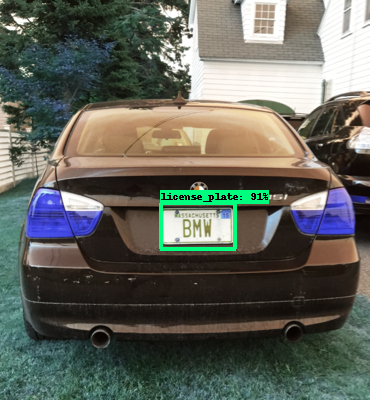

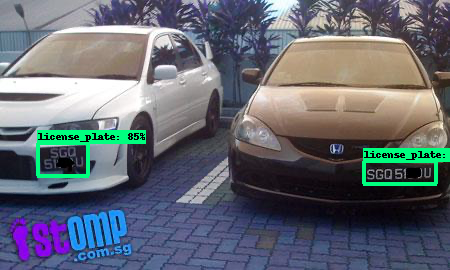

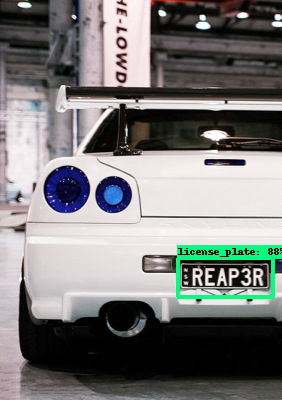

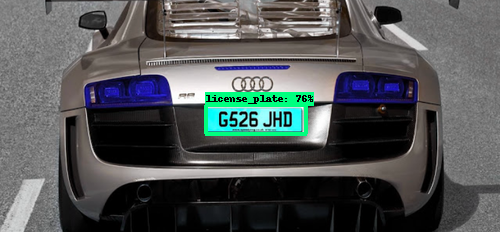

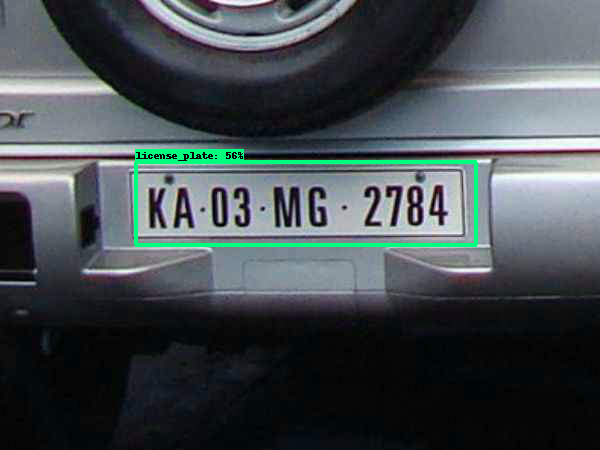

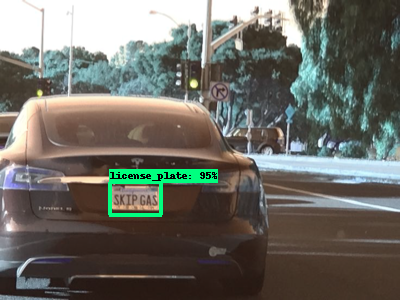

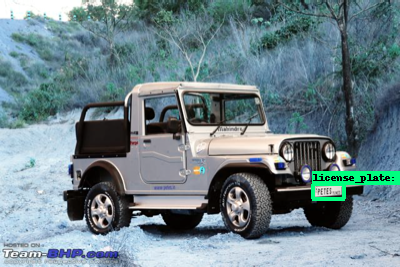

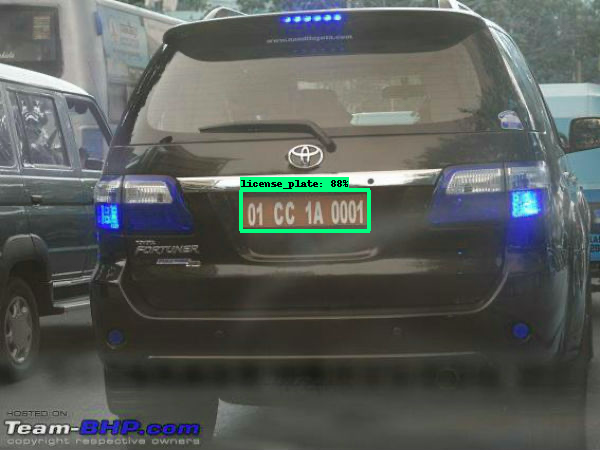

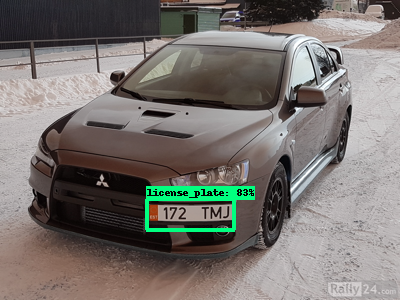

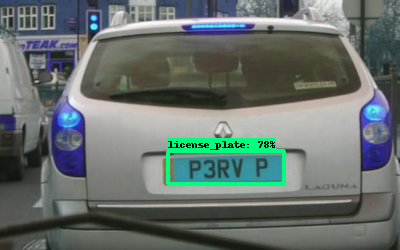

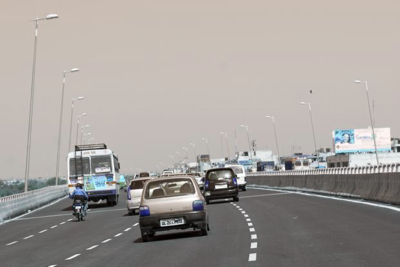

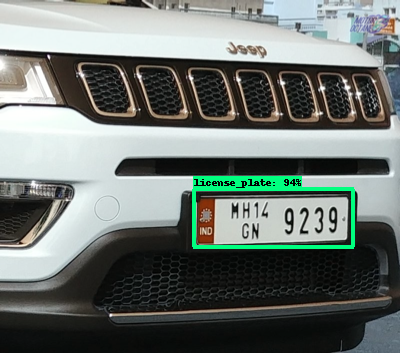

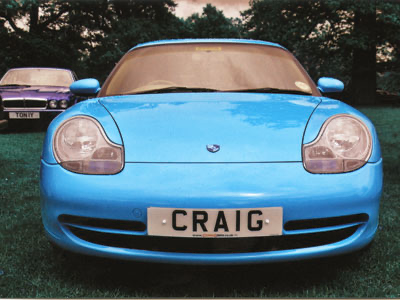

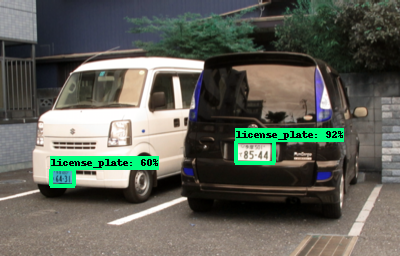

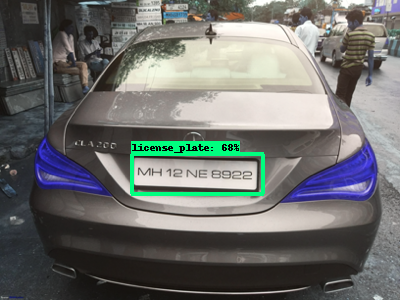

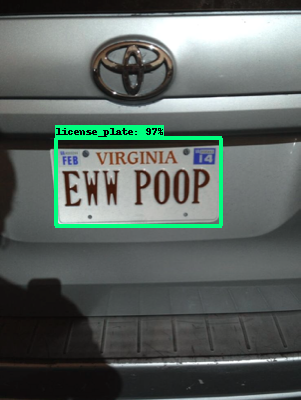

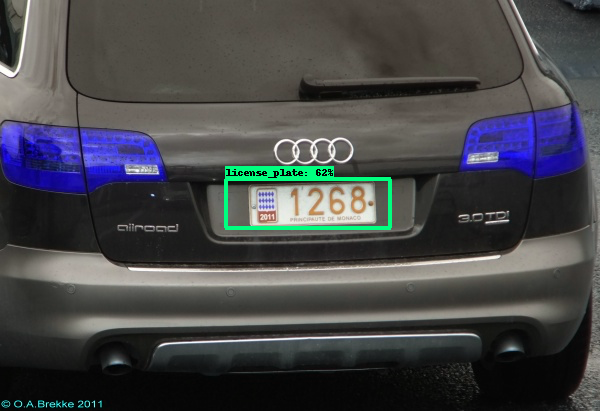

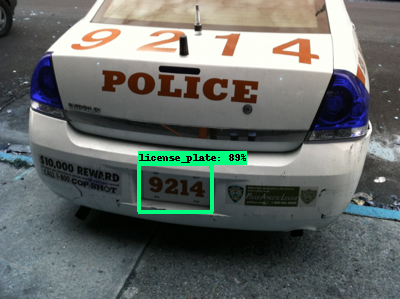

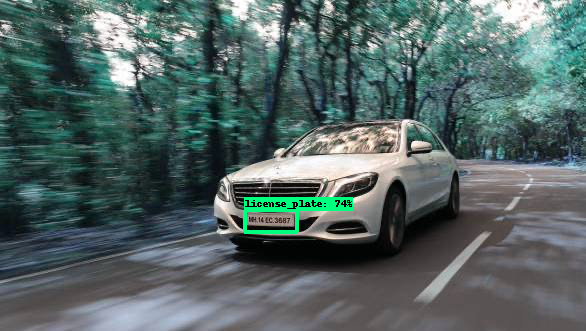

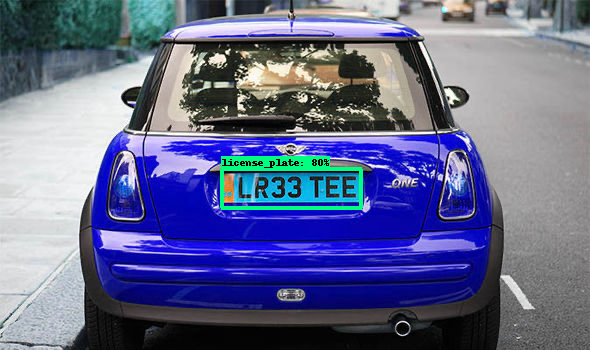

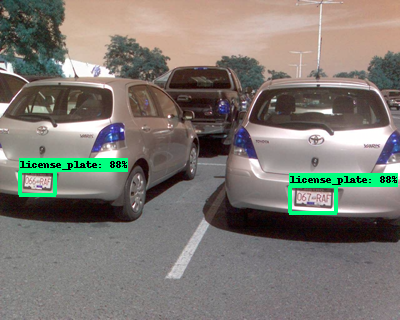

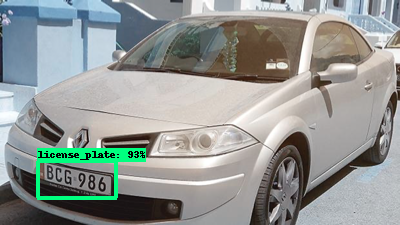

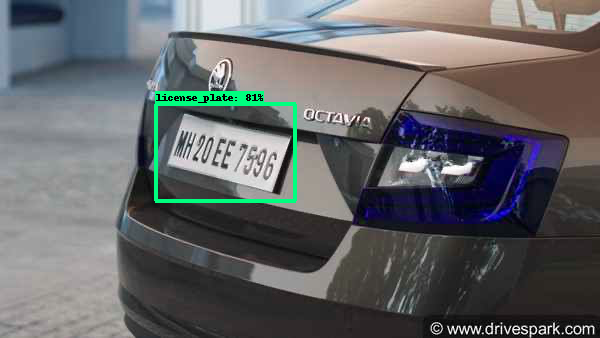

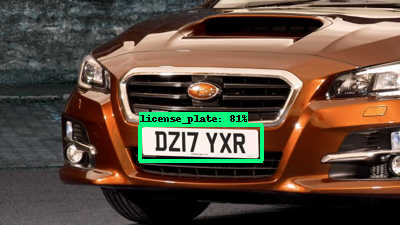

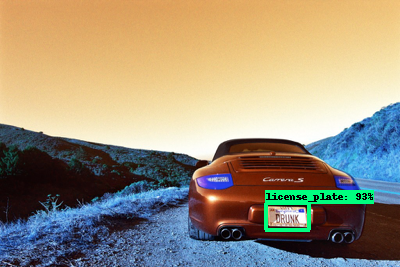

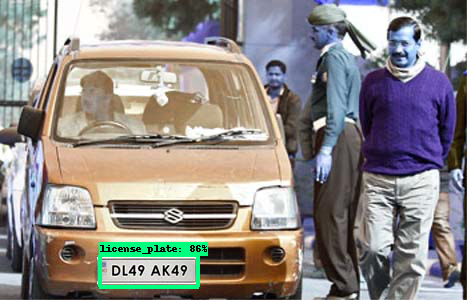

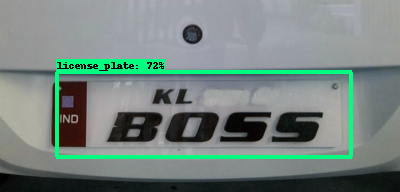

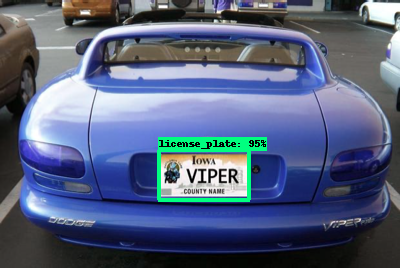

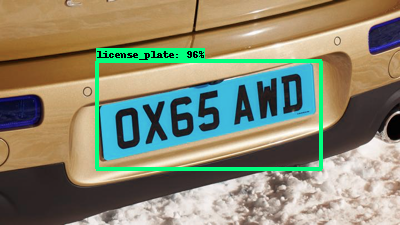

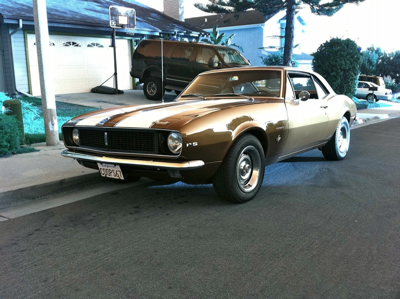

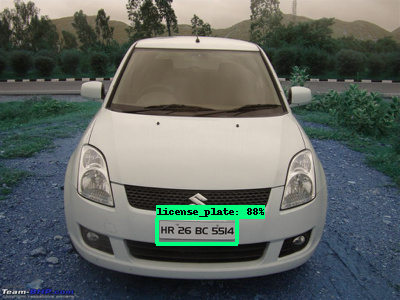

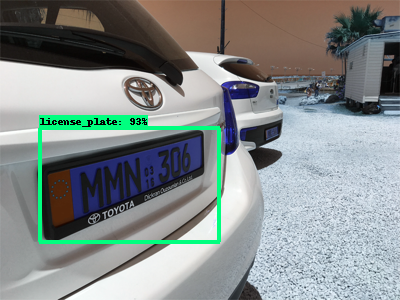

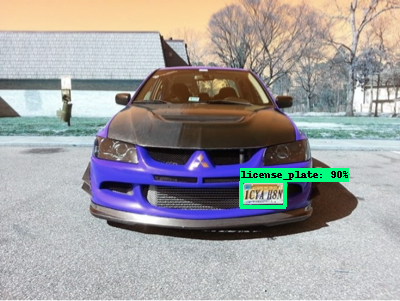

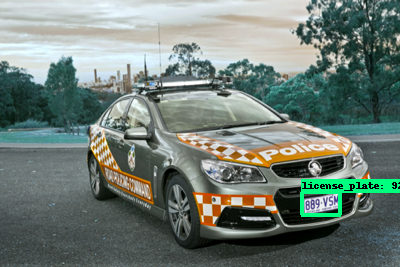

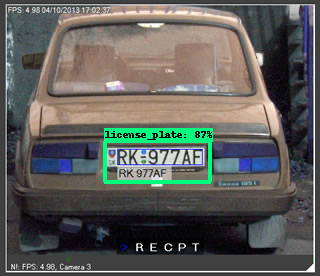

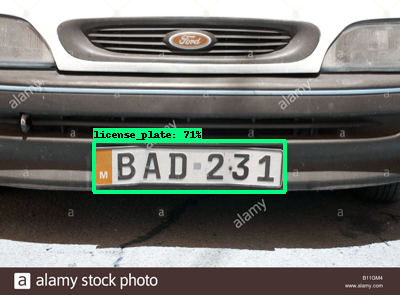

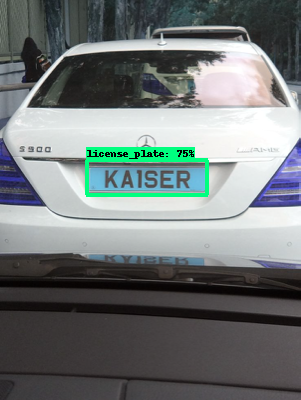

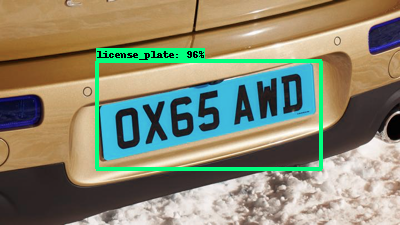

In [75]:
for image_path in TEST_IMAGE_PATHS:
  image_np = load_image_into_numpy_array(image_path)
  input_tensor = tf.convert_to_tensor(
      np.expand_dims(image_np, 0), dtype=tf.float32)
  detections, predictions_dict, shapes = detect_fn(input_tensor)

  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.5,
        agnostic_mode=False,
  )

  cv2_imshow(image_np_with_detections)